In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
mydata = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df=pd.read_csv(mydata)


In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
training_set = df.iloc[:, 1: 2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
x_train = []
y_train = []
for i in range(60, 2035):
    x_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 15s 130ms/step - loss: 0.0089
Epoch 2/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 8s 134ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0021
Epoch 13/100

In [12]:
data_test =df=pd.read_csv(mydata)
real_stock_price = data_test.iloc[:, 1:2].values

In [16]:
data_total = pd.concat((df['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [17]:
x_test = []
for i in range(60, 76):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

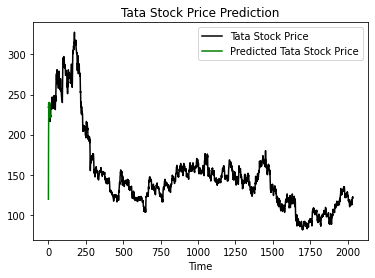

In [18]:
plt.plot(real_stock_price, color = 'black', label = 'Tata Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Tata Stock Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel = ('Tata Stock Price')
plt.legend()
plt.show()